Goal: Understand travel trends and visitor distribution using interactive visualization
Tools: Pandas, Plotly
Outcome: Extracted location popularity and trend patterns using dynamic charts
Skill Demonstrated: Interactive EDA & storytelling with data


# Plotly and its advantages over plt, sns
Plotly's main advantage over Seaborn and Matplotlib is its ability to create interactive, web-based visualizations. While Matplotlib and Seaborn are excellent for generating static, publication-quality plots, Plotly excels in dynamic data exploration and dashboarding.

Plotly Advantages Over Matplotlib and Seaborn:
- Interactivity: The primary advantage of Plotly is built-in interactivity, including features like zooming, panning, and hovering over data points to reveal additional information without cluttering the chart with labels. Matplotlib and Seaborn generally produce static images.
- Web Integration: Plotly charts are browser-based and can be easily embedded into web applications, blogs, and interactive dashboards, making them ideal for online sharing and real-time updates.
- Aesthetics and Defaults: Plotly Express, the high-level interface, often requires fewer lines of code to generate visually appealing and modern-looking plots with professional default settings compared to Matplotlib, which may require extensive customization.
- 3D and Specialized Plots: Plotly has strong, interactive support for 3D plots (allowing rotation and zoom) and a wide variety of specialized financial and scientific chart types.
- Integration with Dash: Plotly integrates seamlessly with its companion library, Dash, to build full-fledged analytical web applications and interactive dashboards.
- User Experience: Interactivity enhances the user experience by making data exploration more engaging and insightful, which is highly valuable for presentations or data analysis where stakeholders can interact with the data directly.

When to Use Matplotlib or Seaborn:
Despite Plotly's strengths, Matplotlib and Seaborn remain essential tools:

- Static, Publication-Quality Plots: Matplotlib offers granular control over every aspect of a plot, making it the go-to choice for specific formatting requirements for academic papers or publications.
- Statistical Visualizations: Seaborn is built on Matplotlib and provides a high-level interface to quickly create complex and attractive statistical plots like heatmaps and violin plots with minimal code, which is highly valuable during the exploratory data analysis (EDA) phase.
- Foundational Knowledge: Matplotlib is considered foundational for Python visualization, and understanding its object-oriented interface helps in customizing plots in other libraries like Seaborn.



---


Comparison Table:

| Feature | Matplotlib | Seaborn | Plotly |
|---------|------------|---------|--------|
| Primary Focus | Static, publication-quality plots | Statistical data visualization | Interactive, web-based visualizations |
| Interactivity | Limited / Static | Limited / Static | Built-in (zoom, pan, hover) |
| Code Complexity | More code for complex plots | Less code for statistical plots | Minimal code with Plotly Express |
| Learning Curve | Steeper | Moderate | Moderate |
| Customization | Extensive control over every element | Good defaults, can use Matplotlib for fine-tuning | Good defaults with customization options |
| Best For | Publication figures, custom layouts | Exploratory data analysis, statistical plots | Dashboards, web apps, interactive exploration |
| 3D Support | Basic 3D plots | Limited | Excellent interactive 3D |
| Web Integration | Requires additional tools | Requires additional tools | Native browser-based output |
| Integration | Works with NumPy/pandas | Built on Matplotlib, works with pandas | Works with pandas, Dash for apps |


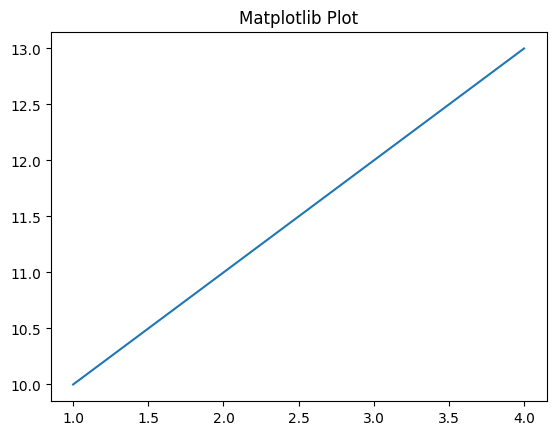

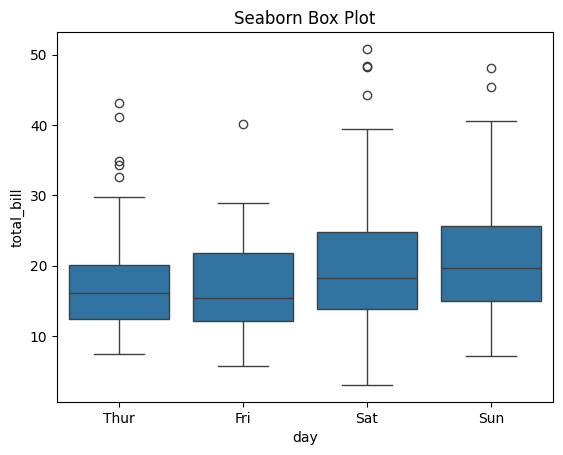

In [65]:
# Example Comparison:
# Matplotlib - Static plot
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame({'x': [1, 2, 3, 4], 'y': [10, 11, 12, 13]})
plt.plot(df['x'], df['y'])
plt.title('Matplotlib Plot')
plt.show()

# Seaborn - Statistical plot
import seaborn as sns
tips = sns.load_dataset('tips')
sns.boxplot(data=tips, x='day', y='total_bill')
plt.title('Seaborn Box Plot')
plt.show()

# Plotly - Interactive plot
import plotly.express as px
fig = px.scatter(tips, x='total_bill', y='tip',
                 color='day', title='Plotly Interactive Scatter Plot')
fig.show()

In [66]:
df_tourism = pd.read_csv('/content/tourism_data.csv')
df_tourism.head()

,Month,Tourist_Arrivals,Country,Average_Travel_Cost,Hotel_Bookings,Hotel_Price,Season,Start_Date,End_Date,Activity,Hotel_Rating
0,Jan,12000,USA,800,300,100,Winter,2025-01-05,2025-01-10,Sightseeing,4.5
1,Feb,15000,UK,750,280,120,Winter,2025-02-10,2025-02-15,Adventure Sports,4.2
2,Mar,18000,Germany,900,320,130,Spring,2025-03-15,2025-03-20,Cultural Tour,4.7
3,Apr,21000,France,850,310,110,Spring,2025-04-20,2025-04-25,Beach Holiday,4.3
4,May,25000,India,700,290,140,Summer,2025-05-25,2025-05-30,Mountain Trek,4.1


In [67]:
# Analyzing tourism trend overtime
arrival_plot=px.line(df_tourism, y='Tourist_Arrivals', x= 'Month', title='Tourism Arrivals Over Time')
arrival_plot.show()

In [68]:
# Analyzing tourism trend over time with more analytical parameters
# Adding 'Country' to 'color' to see trends per country
# Adding 'Average_Travel_Cost' and 'Hotel_Bookings' to 'hover_data' for detailed information on hover
# Adding 'markers=True' to highlight individual data points

arrival_plot = px.line(
    df_tourism,
    y='Tourist_Arrivals',
    x='Month',
    color='Country',  # Differentiate lines by country
    hover_data=['Average_Travel_Cost', 'Hotel_Bookings'], # Show additional data on hover
    markers=True, # Display markers for each data point
    title='Tourism Arrivals Over Time by Country with Cost and Booking Data'
)
arrival_plot.show()

# Tourist arrival by Country

In [69]:

fig=px.bar(df_tourism,x='Country',y='Tourist_Arrivals',title='Tourist Arrivals by Country')
fig.show()

# Gantt Chart
A Gantt chart is a visual project management tool that uses horizontal bar charts to schedule, plan, and track tasks over a specific timeline. It displays start/end dates, task durations, team responsibilities, and dependencies between activities. Key components include a task list, timeline, bars, and milestones


---


Plotly provides a simple, high-level interface called Plotly Express to create interactive Gantt charts, which are also referred to as timeline charts.

Key Function: px.timeline()
The recommended way to create a Gantt chart in Python with Plotly is by using the px.timeline() function, introduced in version 4.9. This function is designed to handle time-series data and works well with data stored in a Pandas DataFrame.

Key Features of Plotly Gantt Charts:
- Interactive: Plotly charts are interactive by nature, allowing users to zoom, pan, and hover over bars for details like start and end times
- Data Flexibility: You can input data using a variety of formats, including Pandas DataFrames or lists of dictionaries
- Customization:
    - Color Coding: Tasks can be colored by a specific variable (e.g., resource, completion status)
    - Axis Types: While typically using dates for the x-axis, you can force a linear axis for numerical values if needed
    - Milestones: Milestones and specific dates can be highlighted by adding shapes or vertical lines
    - Annotations: Text and annotations can be added and positioned within or outside the bars
- Integration: These charts can be used within web applications built with Dash

Basic Example:
```python
import plotly.express as px
import pandas as pd

# Sample data
df = pd.DataFrame([
    dict(Task="Task A", Start='2024-01-01', Finish='2024-01-10', Resource="Team 1"),
    dict(Task="Task B", Start='2024-01-05', Finish='2024-01-15', Resource="Team 2"),
    dict(Task="Task C", Start='2024-01-10', Finish='2024-01-20', Resource="Team 1"),
    dict(Task="Task D", Start='2024-01-15', Finish='2024-01-25', Resource="Team 3")
])

# Create Gantt chart
fig = px.timeline(df, x_start="Start", x_end="Finish", y="Task",
                  color="Resource", title="Basic Gantt Chart")
fig.show()
```

Advanced Example with Customizations:
```python
import plotly.express as px
import pandas as pd
from datetime import datetime

# Sample project data
df = pd.DataFrame([
    dict(Task="Planning", Start='2024-01-01', Finish='2024-01-07',
         Resource="Manager", Progress="Not Started"),
    dict(Task="Design", Start='2024-01-08', Finish='2024-01-21',
         Resource="Designer", Progress="In Progress"),
    dict(Task="Development", Start='2024-01-15', Finish='2024-02-15',
         Resource="Developer", Progress="In Progress"),
    dict(Task="Testing", Start='2024-02-10', Finish='2024-02-25',
         Resource="QA", Progress="Not Started"),
    dict(Task="Deployment", Start='2024-02-20', Finish='2024-02-28',
         Resource="DevOps", Progress="Not Started")
])

# Create customized Gantt chart
fig = px.timeline(df, x_start="Start", x_end="Finish", y="Task",
                  color="Progress", color_discrete_map={
                      "Not Started": "gray",
                      "In Progress": "blue",
                      "Completed": "green"
                  },
                  title="Project Timeline Gantt Chart",
                  labels={"Task": "Project Tasks"})

# Update layout for better appearance
fig.update_yaxes(categoryorder="total ascending")  # Sort tasks
fig.update_xaxes(title_text="Timeline")
fig.update_layout(
    height=500,
    showlegend=True,
    hovermode="closest"
)

# Add current date marker (milestone)
current_date = '2024-01-20'
fig.add_vline(x=pd.to_datetime(current_date),
              line_width=2, line_dash="dash",
              line_color="red",
              annotation_text="Current Date")

fig.show()
```

Example with Numerical Values (instead of dates):
```python
import plotly.express as px
import pandas as pd

# Sample data with numerical values
df = pd.DataFrame([
    dict(Task="Task A", Start=0, Finish=5, Status="Completed"),
    dict(Task="Task B", Start=2, Finish=8, Status="In Progress"),
    dict(Task="Task C", Start=5, Finish=12, Status="Not Started"),
    dict(Task="Task D", Start=8, Finish=15, Status="Not Started")
])

# Create Gantt chart with numerical axis
fig = px.timeline(df, x_start="Start", x_end="Finish", y="Task",
                  color="Status", title="Project Timeline (Numerical)")
fig.update_xaxes(title_text="Time Units")
fig.update_layout(showlegend=True)
fig.show()
```

Deprecation Note:
Prior to the introduction of px.timeline(), the create_gantt() function from plotly.figure_factory was the standard. While this factory function still works, px.timeline() is now the recommended approach for its ease of use and better integration with the rest of the Plotly Express library.

Example with Multiple Resources and Milestones:
```python
import plotly.express as px
import pandas as pd
import numpy as np

# Complex project data
np.random.seed(42)
tasks = ['Research', 'Analysis', 'Development', 'Testing',
         'Documentation', 'Review', 'Deployment']
resources = ['Team A', 'Team B', 'Team C']
data = []

start_date = pd.Timestamp('2024-01-01')
for i, task in enumerate(tasks):
    duration = np.random.randint(5, 15)
    data.append(dict(
        Task=task,
        Start=start_date + pd.Timedelta(days=i*7),
        Finish=start_date + pd.Timedelta(days=i*7 + duration),
        Resource=np.random.choice(resources),
        Priority=np.random.choice(['High', 'Medium', 'Low'])
    ))

df = pd.DataFrame(data)

# Create Gantt chart with multiple color dimensions
fig = px.timeline(df, x_start="Start", x_end="Finish", y="Task",
                  color="Resource", pattern_shape="Priority",
                  title="Complex Project Gantt Chart")

# Add milestones (vertical lines for important dates)
milestones = [
    ('2024-02-01', 'Phase 1 Complete'),
    ('2024-03-01', 'Phase 2 Complete'),
    ('2024-03-15', 'Project Review')
]

for milestone_date, milestone_name in milestones:
    fig.add_vline(x=pd.to_datetime(milestone_date),
                  line_width=1, line_dash="dot",
                  line_color="orange",
                  annotation_text=milestone_name)

fig.update_layout(height=600)
fig.show()


In [70]:
# Ensure 'Start_Date' and 'End_Date' are datetime objects for accurate plotting.
# This is a good practice for time-series data to avoid potential parsing issues or incorrect sorting.
df_tourism['Start_Date'] = pd.to_datetime(df_tourism['Start_Date'])
df_tourism['End_Date'] = pd.to_datetime(df_tourism['End_Date'])

# Create an interactive timeline (Gantt) chart for tourism itineraries.
# x_start and x_end define the duration of each activity.
# y specifies the activity to be displayed.
fig = px.timeline(df_tourism, x_start='Start_Date', x_end='End_Date', y='Activity', title='Tourism Itinerary')

# Rectification: Sort the y-axis categories ('Activity') to ensure a consistent and readable order.
# 'category ascending' will sort the activities alphabetically.
fig.update_yaxes(categoryorder='category ascending')

fig.show()

# Correlation between Travel Features


In [71]:
# Import plotly.figure_factory for creating specialized and complex plots,
# such as correlation heatmaps or Gantt charts (though px.timeline is now preferred for Gantt).
# This module is particularly useful for advanced statistical visualizations like dendrograms and heatmaps.
import plotly.figure_factory as ff

In [72]:
# Compute correlation matrix (Numerical Values Only)
correlation_matrix = df_tourism.select_dtypes(include=['number']).corr()
print(correlation_matrix)
# Creating annotation heatmat with smaller font
corr_fig=ff.create_annotated_heatmap(
    z=correlation_matrix.values,
    x=list(correlation_matrix.columns), # Or x=correlation_matrix.columns.tolist()
    y=list(correlation_matrix.index), # Or y=correlation_matrix.index.tolist()
    colorscale='Viridis',
    showscale=True,
    # Rectified: Corrected 'correlation.matrix.values' to 'correlation_matrix.values'
    # Formats each correlation value to two decimal places for display as text annotations on the heatmap.
    annotation_text=[[f"{val:.2f}" for val in row] for row in correlation_matrix.values],
    font_colors=['white']
    )
corr_fig.update_layout(
    width=800,
    height=800,
    margin=dict(t=50,l=100),
    title='Correlation Heatmap')
# Display the correlation heatmap

annotation_text=[[f"{val:.2f}" for val in row] for row in correlation_matrix.values],

print(annotation_text)
corr_fig.show()

                     Tourist_Arrivals  Average_Travel_Cost  Hotel_Bookings  \
Tourist_Arrivals             1.000000             0.328649        0.545347   
Average_Travel_Cost          0.328649             1.000000        0.911307   
Hotel_Bookings               0.545347             0.911307        1.000000   
Hotel_Price                  0.304292             0.249445        0.461044   
Hotel_Rating                 0.098151             0.899503        0.818467   

                     Hotel_Price  Hotel_Rating  
Tourist_Arrivals        0.304292      0.098151  
Average_Travel_Cost     0.249445      0.899503  
Hotel_Bookings          0.461044      0.818467  
Hotel_Price             1.000000      0.237381  
Hotel_Rating            0.237381      1.000000  
([['1.00', '0.33', '0.55', '0.30', '0.10'], ['0.33', '1.00', '0.91', '0.25', '0.90'], ['0.55', '0.91', '1.00', '0.46', '0.82'], ['0.30', '0.25', '0.46', '1.00', '0.24'], ['0.10', '0.90', '0.82', '0.24', '1.00']],)
